# Project Overview
Description
This project is centered at optimizing patterns for prompts fed into LLMs 


In [2]:
pip install openai

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# MODULES/DEPENDENCIES/LIBRARIES
import openai
from dotenv import load_dotenv
import os
from langchain_openai import ChatOpenAI

In [5]:



# Load environment variables from .env file
load_dotenv()

# Get the API key from the environment
api_key = os.getenv("OPENAI_API_KEY")

# Ensure the API key is loaded
if api_key is None:
    raise ValueError("OPENAI_API_KEY is not set. Check your .env file.")



#Define the conversation messages 
conversation_messages = [{"role": "user", "content":"You are a helpful event management assistant."},
    {"role": "system", "content": "What are some good conversation starters at networking events?"},
    {"role": "assistant", "content": ""}]

# Create an OpenAI client instance (new API structure)
client = openai.OpenAI()

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages= conversation_messages
)

print(response.choices[0].message.content)

Here are some effective conversation starters for networking events:

1. **Compliment the Setting**: “This venue is fantastic! Have you been here before?”

2. **Discuss the Event**: “What brought you to this event today? Are you looking to connect with anyone specific?”

3. **Share a Personal Experience**: “I just attended a really interesting workshop on [topic]. Have you participated in any sessions that stood out to you?”

4. **Ask About Their Work**: “What do you enjoy most about your work? I’d love to hear more!”

5. **Create Common Ground**: “I noticed you’re from [location/company]. I recently [visited/learned about] it, and I found it fascinating. What do you think about it?”

6. **Seek Advice**: “I’m hoping to learn more about [industry/field]. What advice would you give someone just starting out?”

7. **Comment on Current Trends**: “Have you noticed any interesting trends in our industry lately? I’d love to hear your perspective.”

8. **Talk about Future Goals**: “What’s a pr

In [6]:
# Creating a function to call the response from the prompt 
def get_response(prompt):
    #Load environment variable for env file
    load_dotenv()
    # define conversation messages 
    conversation_messages = [
        {"role": "user", "content": prompt}, 
        {"role": "system", "content": "What are some good conversation starters at networking events?"},
        {"role": "assistant", "content": ""}
       
    ]
     # Create an OpenAI client instance (new API structure)
    client = openai.OpenAI()
    #Create a request to the chat completion endpoint
   
    response = client.chat.completions.create( 
        model="gpt-4o-mini",
        messages = conversation_messages)
    return response.choices[0].message.content
        

In [7]:
#Test
request = get_response("Can you give me the first question to ask when meeting people")
print(request)

A great first question to ask when meeting someone new is, "What brought you to this event?" This question invites them to share their interests or professional background, making it a natural segue into further conversation.


### <b> EXPLORING PROMPT ENGINEERING </b>

#### <b> KEY PRINCIPLES OF PROMPTS </b>

##### A. Requesting simple response 

In [17]:
# 1. Requesting simple response 

request = get_response("Generate 10 lines of a poem about ChatGPT.")
print(request)

In the realm of code and light, I dwell,  
A spark of thought, where stories swell,  
With every query, I weave a thread,  
Of knowledge vast, where ideas are fed.  

A digital sage with a boundless mind,  
In whispered bytes, your questions unwind,  
From woes to wonders, I strive to engage,  
A partner in thought, upon the stage.  

Through prose and rhyme, I paint the skies,  
In the heart of the web, a companion lies.  


##### B. Optimize prompt by improving prompt inputs 

In [20]:
request = get_response("Generate 10 lines of a poem about ChatGPT that a 5 year old can understand ")
print(request)

In a box that glows, oh so bright,  
Lives a friend who’s full of light.  
Just type your words, and watch them go,  
ChatGPT is here to help you flow.  

It knows about bears, and stars, and fun,  
Telling stories for everyone!  
Ask it a question, it’s happy to play,  
With words that dance, all night and day.  

So come on, little buddy, give it a try,  
ChatGPT is waiting, oh my, oh my!


### 2. Using Actions Verbs | Specific instructions 
-Avoid ambiguous verbs avoid using ambiguous verbs like understand, think, feel, try, and know, which might confuse the model's understanding.
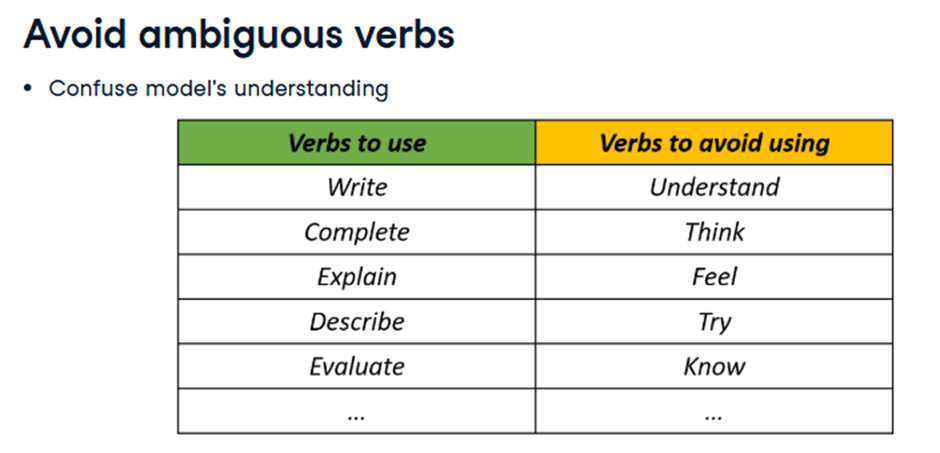![image.png]

##### C. Use prompts to limit words not max_tokens | Use Delimiters

In [21]:
story = "I see the moon"

request = get_response(f"""Complete the story delimited by triple backticks with only ONE paragraphs
        ```{story}```"""
)
print(request)

I see the moon hanging low in the night sky, its silvery glow illuminating the world around me, casting shadows that dance like whispers in the air. As I stroll through the quiet park, I can almost hear the secrets the night holds, each breeze carrying a tale from long ago. The gentle rustle of leaves seems to echo the heartbeat of the earth, reminding me of the stories that unite us all beneath this cosmic canopy. Suddenly, a figure appears in the distance, silhouetted against the moonlight, and I feel an inexplicable pull towards them, as if fate has woven our paths together for a reason, urging me to discover what adventures await when two souls collide under the ethereal light of the moon.


##### Other key principles for prompt creation include 
- using delimiters to specify the input part of prompt and mention which delimiter is used
- Formulating detailed instructions
- Instructing llms to return outputs using specific structures like tables, list , paragraph
- 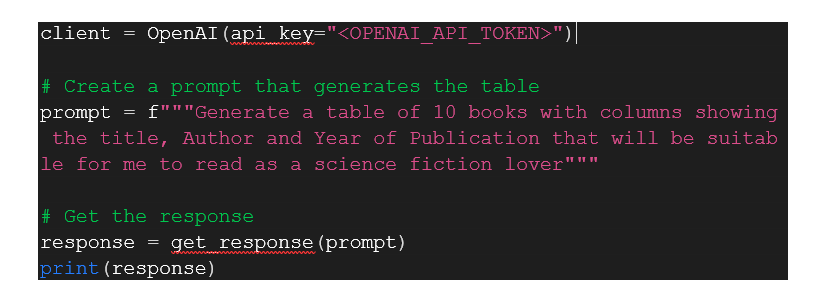
- Custom prompts can also be created e.g
   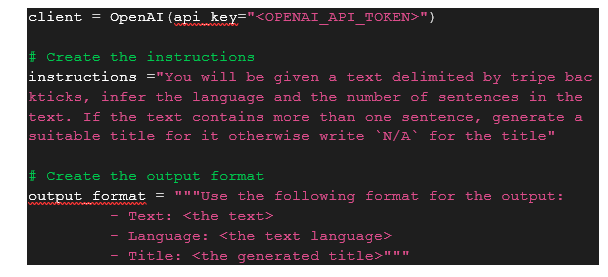
- Conditional prompts can also be created e.g
 

### Types of Prompts 

### X. FEW SHOT PROMPTING

##### Few Shot Prompting
-Few-shot prompting is a technique in prompt engineering where you provide a language model with a few examples of input-output pairs to guide its response. This helps the model understand the desired pattern or task without requiring extensive fine-tuning. it uses a combination of examples, example prompt, suffix and input_variables 

In [10]:
#Import necessary dependencies
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate

In [11]:
# Creating the the set of examples using the list of dictionaries below 
#the example set defined here contains the list of question and answers 
examples = [
    {
        "question" :"The credit score for David Robin is?",
        "answer" : "David Robin has a credit score of 498" },
      {
        "question" :"The credit score for Jennifer Powel is?",
        "answer" : "Jennifer Powel has a credit score of 498" },
      {
        "question" :"The credit score for Jeremy Doku is?",
        "answer" : "Jeremy Doku has a credit score of 498" }
]

In [12]:
#Structuring of examples for the model using the example prompt
example_prompt = PromptTemplate.from_template("Question: {question}/n{answer}")

In [13]:

#Combining the templates togther
prompt_template = FewShotPromptTemplate(examples = examples,
                                        example_prompt = example_prompt,
                                        suffix = "Question : {input}",
                                        input_variables = ["input"]
                                       )



In [14]:
#Integrating with llm
# Creating a simple langchain_promot_function

def langchain_response(prompt):
    load_dotenv()
    llm = ChatOpenAI( model = "gpt-4o-mini")

    llm_chain = prompt_template | llm
    response  = llm_chain.invoke(prompt)
    return response.content

        

In [15]:
prompt1 = {"input":"What is the credit score of jeremy doku divided by 2?"}
langchain_response(prompt1)

'The credit score for Jeremy Doku is 498. Dividing that by 2 gives:\n\n498 ÷ 2 = 249. \n\nSo, the credit score of Jeremy Doku divided by 2 is 249.'

In [16]:
prompt2 = {"input":"What are the roles of a support worker in the UK?"}
langchain_response(prompt2)

"In the UK, support workers play a vital role in assisting individuals who may have various needs, including those with disabilities, mental health issues, or elderly individuals requiring assistance. The roles of a support worker can vary widely depending on the setting and the specific needs of the individuals they support, but generally, their responsibilities include:\n\n1. **Personal Care**: Assisting with daily living activities such as bathing, dressing, grooming, and eating.\n\n2. **Emotional Support**: Providing companionship, listening, and offering encouragement to promote emotional well-being.\n\n3. **Health Monitoring**: Observing and reporting any changes in a client's health or behavior and helping with medication management if required.\n\n4. **Promoting Independence**: Encouraging individuals to perform tasks on their own and fostering self-sufficiency.\n\n5. **Assisting with Mobility**: Helping clients move around safely, using equipment if necessary, such as wheelcha